In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격, PRICE 컬럼으로 DataFrame에 존재
bostonDF['PRICE'] = boston.target

print(bostonDF.shape)
bostonDF.head()

(506, 14)


c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


x
506 행 13 열 
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population

y
506 행 1 열
target (MEDV)     Median value of owner-occupied homes in $1000's

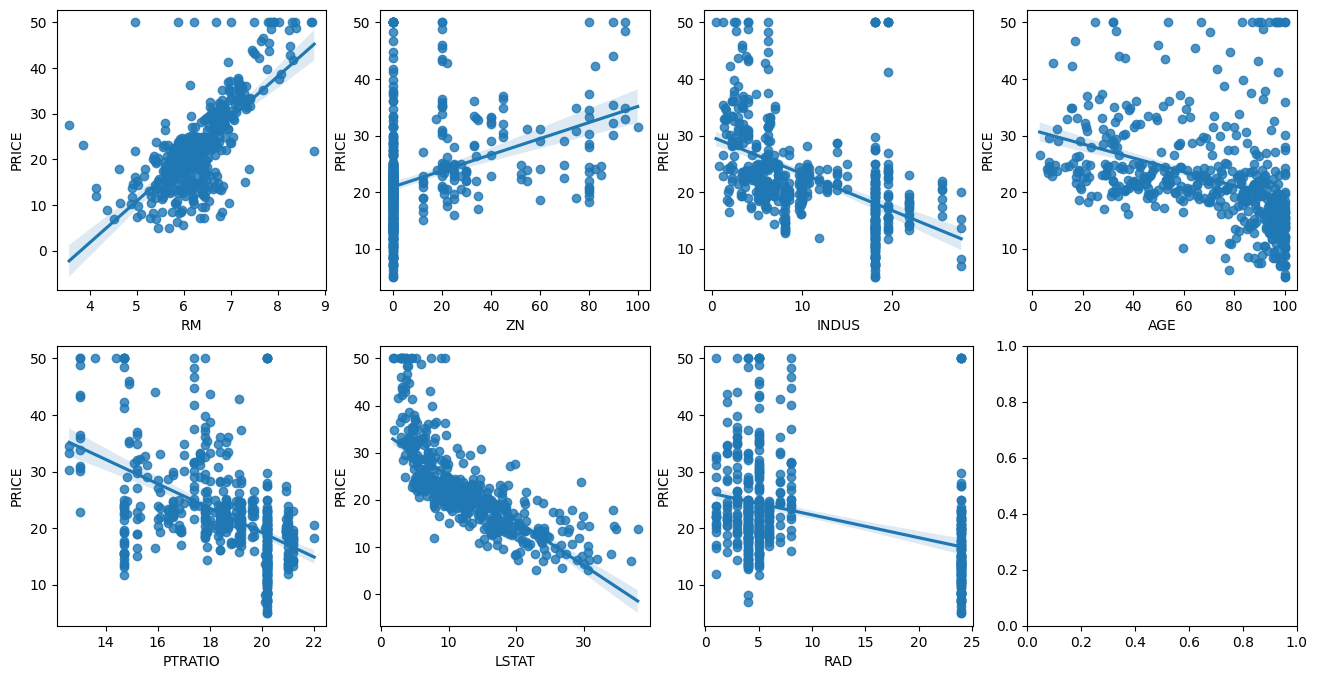

In [22]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2) 
# fig에 16X8짜리 도화지를 그리고
# axs에 
lm_features = ['RM', 'ZN', 'INDUS', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 reqplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse)) # MSE: 17.296916, RMSE:4.158956
# MES 루트 씌운 게 RMSE, MES : 오차값을 보기 위함
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds))) # Variance score: 0.757
# 회귀계수는 accuracy를 못찍음 (정확하게 맞는다는 개념이 없기 때문에 r2_score로 해줘야 함)

MSE: 17.296916, RMSE:4.158956
Variance score: 0.757


In [24]:
print('절편 값 : ', lr.intercept_) # 절편 값 :  40.995595172164435
print('회귀 계수값 : ', np.round(lr.coef_, 1)) # 회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
# y = w1x + w2 (w1, w2는 회귀계수) -> feature값이 10개면 회귀계수도 10개가 들어옴옴

절편 값 :  40.995595172164435
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [20]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_train.columns)
coeff.sort_values(ascending=False)

# NOX 회귀계수 값 -20 -> 너무 커서 해당 값에 영향을 많이 받을 것

# 회귀분석을 할 때 다중공선성 문제가 발생하기 때문에 feature값을 찍어보고 확인을 해봤어야 함
# feature를 선택했어야 했음
# -> 다중공선성 문제가 해결되지 않아서 CRIM의 회귀계수 값이 낮게 나옴

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

In [26]:
# 회귀계수 값을 보기 위해 변수 값을 더 제거해줘봄
# 회귀계수 값이 변화하는 걸 볼 수 있음

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE', 'TAX', 'PTRATIO', 'B', 'NOX'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse)) # MSE: 17.296916, RMSE:4.158956
# MES 루트 씌운 게 RMSE, MES : 오차값을 보기 위함
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds))) # Variance score: 0.757
# 회귀계수는 accuracy를 못찍음 (정확하게 맞는다는 개념이 없기 때문에 r2_score로 해줘야 함)

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_train.columns)
coeff.sort_values(ascending=False)

MSE: 20.752957, RMSE:4.555541
Variance score: 0.709


CHAS     3.9
RM       3.8
ZN       0.1
AGE     -0.0
RAD     -0.0
CRIM    -0.1
INDUS   -0.2
LSTAT   -0.6
DIS     -1.6
dtype: float64

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
corr_X_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


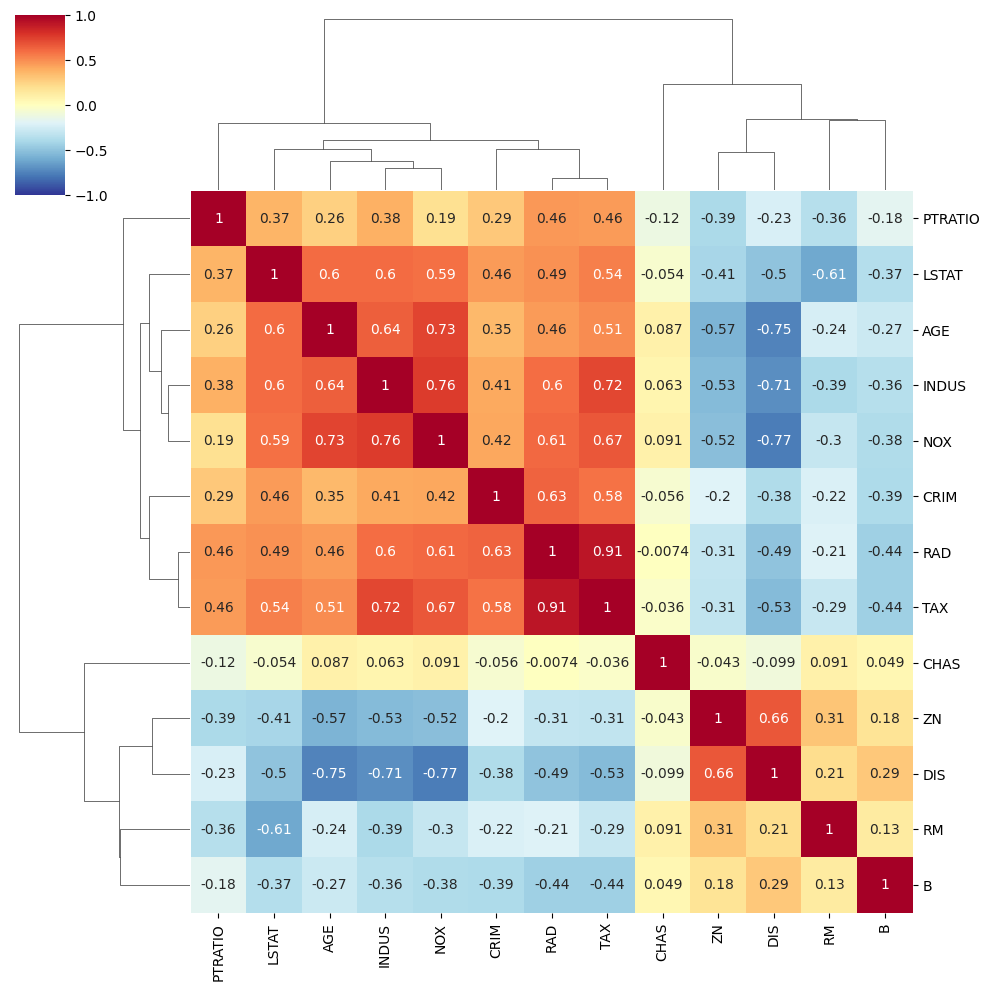

In [32]:
df = corr_X_data.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

              # clustermap은 클러스트링도 해주는 히트맵

C:\Users\YS\AppData\Local\Temp\ipykernel_14284\2299706860.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


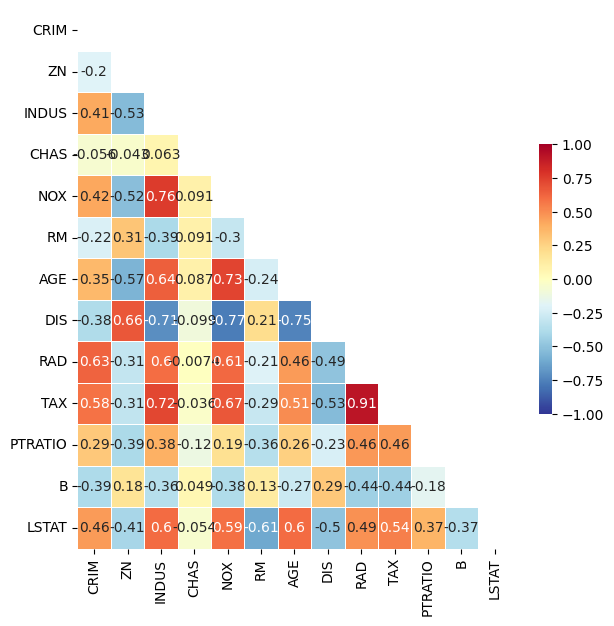

In [33]:
df = corr_X_data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [39]:
# NOX와 INDUS 상관관계 0.76 -> 너무 강한건 제거 해야 함
# => 다 선택해도 상관없지만, CRIM과 RM 범죄율과 방 갯수만 갖고 돌려보자
# 0.6도 여기선 강한 편

y_target=bostonDF['PRICE']
# X_data=bostonDF[['RM', 'CRIM', 'ZN', 'RAD', 'INDUS']]
X_data=bostonDF.drop(['PRICE', 'TAX', 'PTRATIO', 'B', 'NOX'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:3f}, RMSE:{1:3F}'.format(mse, rmse)) # MSE: 17.296916, RMSE:4.158956
# MES 루트 씌운 게 RMSE, MES : 오차값을 보기 위함
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds))) # Variance score: 0.757
# 회귀계수는 accuracy를 못찍음 (정확하게 맞는다는 개념이 없기 때문에 r2_score로 해줘야 함)


MSE: 20.752957, RMSE:4.555541
Variance score: 0.709


In [42]:
# 상관관계 말고도 볼 수 있는 방법
# randomforest의 feature_importances_ 확인

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE', 'TAX', 'PTRATIO', 'B', 'NOX'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3,random_state=156)

rf = RandomForestRegressor()
rf.fit(X_data, y_target)
rf.feature_importances_

array([0.05409363, 0.00167738, 0.01317397, 0.00130899, 0.41532074,
       0.0187229 , 0.08060874, 0.00989706, 0.40519659])

In [43]:
# 라쏘

from sklearn.linear_model import Lasso

clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)

y_preds = rf.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 1.331, RMSE : 1.154
Variance score : 0.981


In [46]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neq_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [17]:
# 회귀분석
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격, PRICE 컬럼으로 DataFrame에 존재
bostonDF['PRICE'] = boston.target


y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.2,random_state=156)

lr = LinearRegression()
rf = RandomForestRegressor()

regressions = [lr, rf]
for regression in regressions:
    regression.fit(X_train, y_train)
    pred = regression.predict(X_test)
    class_name = regression.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, r2_score(y_test, pred)))

c:\Users\YS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

LinearRegression 정확도 : 0.7855
RandomForestRegressor 정확도 : 0.9139
